In [1]:
# דיוק טוב נחשב - 85 אחוז

In [ ]:
# 784 features, 28*28
# each example is a "dot" in clustering
# dimentual reduction - from 784 features to....
#

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# loading the data and splitting it to X_train,X_test -images and y_train,y_test - labels

fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [4]:
train_images_full.ndim

3

In [5]:
train_images_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_images_full.dtype

dtype('uint8')

In [7]:
# creating validation set and changing the range of the pixels - from 0 to 255 -> from 0 to 1

valid_images, train_images = train_images_full[:5000] / 255.0, train_images_full[5000:] / 255.0
valid_labels, train_labels = train_labels_full[:5000], train_labels_full[5000:]


In [8]:
# We notice that the labels are given without explaining which clothes they are supposed to represent. Therefore, we make a list 
# that will store the item names

label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
# class_names[train_labels[66]]

In [10]:
# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 

def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l

# calling the function to convert the images from 2d to 1d
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)
valid_images_mod=convert(valid_images)


In [11]:
# after convert the images from 2d to 1d
print("number of dimensions:",train_images_mod.ndim)
print("shape",train_images_mod.shape)
print(train_images_mod)

number of dimensions: 2
shape (55000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
valid_images.shape

(5000, 28, 28)

In [13]:
valid_images_mod

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# We check the distribution of labels

for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in train_labels if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in test_labels if j==i])))



Train label 0 count :5543
Test label 0 count :1000
Train label 1 count :5444
Test label 1 count :1000
Train label 2 count :5496
Test label 2 count :1000
Train label 3 count :5499
Test label 3 count :1000
Train label 4 count :5512
Test label 4 count :1000
Train label 5 count :5507
Test label 5 count :1000
Train label 6 count :5507
Test label 6 count :1000
Train label 7 count :5488
Test label 7 count :1000
Train label 8 count :5510
Test label 8 count :1000
Train label 9 count :5494
Test label 9 count :1000


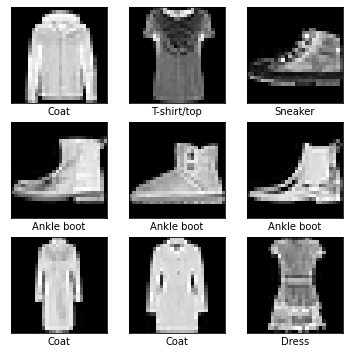

In [15]:
# Before procesing further, let us plot some items and their corresponding classes.

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_images[i]) # using the original train, not the 2d 
    plt.xlabel(label_names[train_labels[i]])
plt.savefig('image_examples.jpg')
plt.show()

In [16]:
train_labels

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler_standard = StandardScaler()

In [19]:
train_images_standardized = train_images_mod.copy()
test_images_standardized = test_images.copy()
# X_train_normalized = X_train.copy()
# X_test_normalized = X_test.copy()

In [20]:
# # Standardization:
# scaler_standard.fit(train_images_mod)
# train_images_standardized= scaler_standard.transform(train_images_standardized)

# # the scaling is with the the same fitted scaler (by the train data)
# #only transform on the test data
# test_images_standardized = scaler_standard.transform(test_images_standardized)



PCA

the more dimensions the training set has, the greater the risk of overfitting
it

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
# ca = PCA(n_components=0.95)
# X_reduced = pca.fit_transform(X_train)


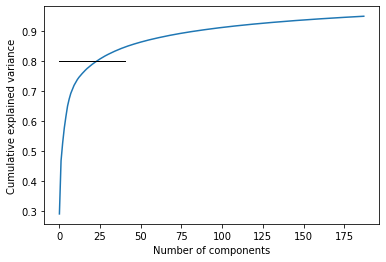

In [23]:
#  we will set n_components to be a float between 0.0 and 1.0, indicating theratio of variance we wish to preserve
pca = PCA(n_components=0.95)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

### the explained variance indicates the proportion of the dataset’s variance that lies along the axis of each principal component.
### in the graph above we can see that when the Explained Variance Ratio is 0.8 (elbow in the
### curve),the explained variance stops growing fast, which means this is a sufficient number of components, and if we choose a greater number, it increases the chances to overfit and we might lose a lot of needed data. 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_log_reg_l2 = Pipeline([('pca',PCA(n_components=25)),('clf',LogisticRegression(multi_class='ovr',penalty='l2',solver='saga'))])
model_ovr=pipe_log_reg_l2.fit(train_images_mod,train_labels)
# pred_labels_pipe_log_reg_l2 = pipe_log_reg_l2.predict(test_images_mod)
# test_acc_pipe_l2 = accuracy_score(pred_labels_pipe_log_reg_l2,test_labels)
# print('Test accuracy of logistic regression on 25 PCs with l2 penalty : ' + str(test_acc_pipe_l2))

In [ ]:
model_ovr.score(train_images_mod, train_labels)

## Multinomial logistic regression

In [ ]:
# our problem is Multi-class Classification: Classification tasks with more than two classes.

In [ ]:
# Logistic Regression is designed for binary classification , therfore it cannot be used for multi-class classification tasks, at least not directly.

In [ ]:
# our solution: The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression(multi_class='ovr',penalty='l2',solver='saga')
#LogisticRegression(multi_class='ovr',penalty='l2',solver='saga')

In [ ]:
# fit the model with data
model_ovr2= logreg.fit(train_images_mod, train_labels)

In [ ]:
model_ovr2.score(train_images_mod, train_labels)

In [ ]:
# # calling the function to convert the images from 2d to 1d
# train_images_mod = convert(train_images)
# test_images_mod  = convert(test_images)
# valid_images_mod=convert(valid_images)

# K-nearest neighbors and Nearest centroid

# Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# gini impurity - when the gini hyperparameter is closer to 0, this means that there are more training instances that belong to the same class.

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(train_images_mod, train_labels)

In [ ]:
train_labels

In [ ]:
len(train_images_mod)

In [ ]:
# visualize the forest - the nodes
from sklearn.tree import export_graphviz
from sklearn import tree
tree.export_graphviz(
 tree_clf,
 out_file="fashion_mnist.dot",
#  feature_names=train_images_mod,
 class_names=label_names,
 rounded=True,
 filled=True
 )


# k means

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(train_images_mod, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [25]:
log_reg.score(train_images_mod, train_labels)


0.8660727272727273

In [27]:
from sklearn.cluster import KMeans

In [28]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("log_reg", LogisticRegression()),
])
pipeline.fit(train_images_mod, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [29]:
 pipeline.score(train_images_mod, train_labels)

0.7520727272727272